# Example: Mapping the depth of the source of the tectonic tremor

We plot on a grid the distance between the depth of the source of the tectonic tremor and the depth of the plate boundary between the subducting oceanic plate and the overriding oceanic plate.

The data are just stored in an ascii file

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/tremor_depth.txt', delim_whitespace=True)
data.head()

,longitude,latitude,depth,cc,d_to_pb,ratio,thickness,ntremor,azimuth
0,-123.264006,47.732699,18.511998,0.026010,-16.181002,0.052503,0.000000,70,-135.000000
1,-123.264006,47.777616,35.394121,0.092790,0.597121,0.284946,12.674613,107,-141.340192
2,-123.264006,47.822532,37.264482,0.051940,2.299482,0.048581,15.334777,102,-149.036243
3,-123.264006,47.867448,45.258994,0.010506,10.107994,0.040955,16.957448,130,-158.198591
4,-123.264006,47.912364,34.874633,0.007548,-0.510367,0.020589,16.888464,134,-168.690068


We use a combination of matplotlib and cartopy to plot the data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.io.shapereader as shapereader

We can change the matplotlib style

In [3]:
plt.style.use('bmh')
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


We choose the Washington North projection

In [4]:
WASHINGTON_NORTH = 2926 # projection

We set the boundaries of the map

In [5]:
lonmin = -123.9
lonmax = -122.5
latmin = 47.6
latmax = 48.4

We begin by plotting the water

In [6]:
shapename = 'ocean'
ocean_shp = shapereader.natural_earth(resolution='10m',
                                       category='physical',
                                       name=shapename)
ocean_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_ocean.shp'

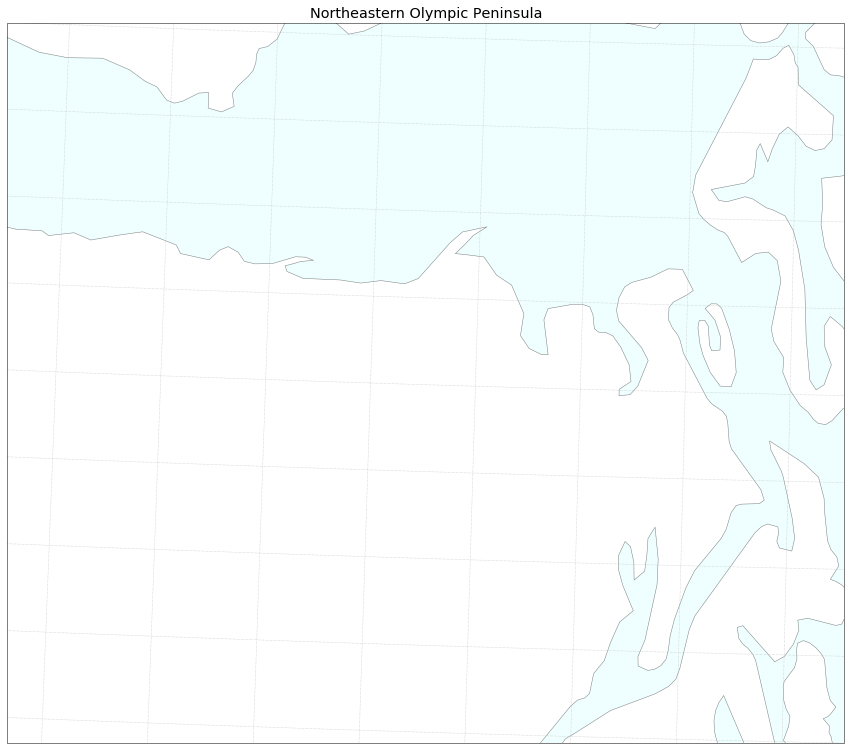

In [7]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.Geodetic())
ax.set_title("Northeastern Olympic Peninsula")
ax.gridlines(linestyle=":")

for myfeature in shapereader.Reader(ocean_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#E0FFFF', edgecolor='black', alpha=0.5)

plt.show()

Then we add the land

In [8]:
shapename = 'land'
land_shp = shapereader.natural_earth(resolution='10m',
                                       category='physical',
                                       name=shapename)
land_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_land.shp'

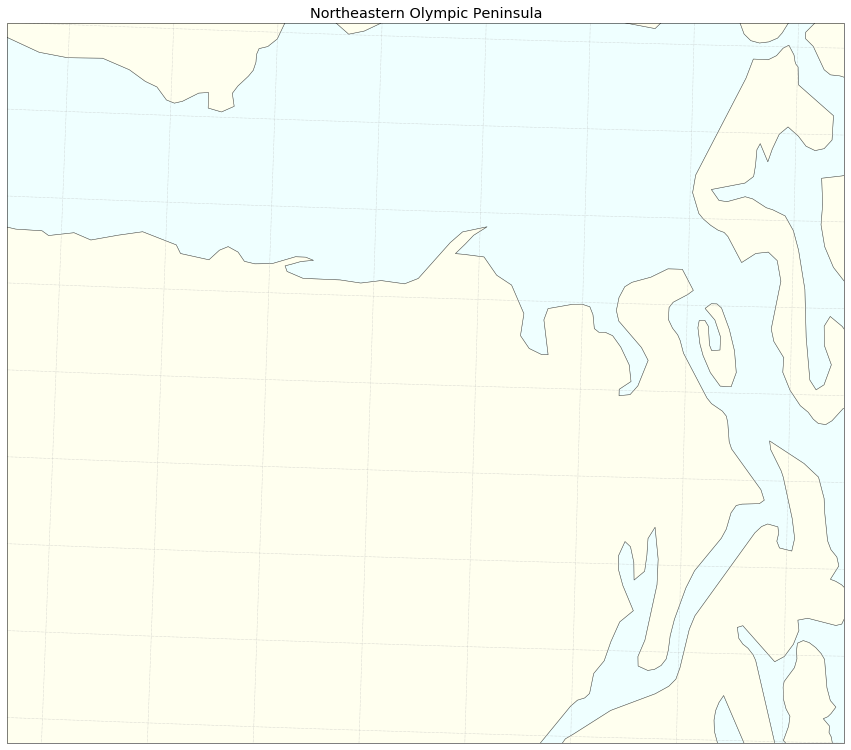

In [9]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.Geodetic())
ax.set_title("Northeastern Olympic Peninsula")
ax.gridlines(linestyle=":")
for myfeature in shapereader.Reader(ocean_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#E0FFFF', edgecolor='black', alpha=0.5)

for myfeature in shapereader.Reader(land_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#FFFFE0', edgecolor='black', alpha=0.5)

plt.show()

And we add our data

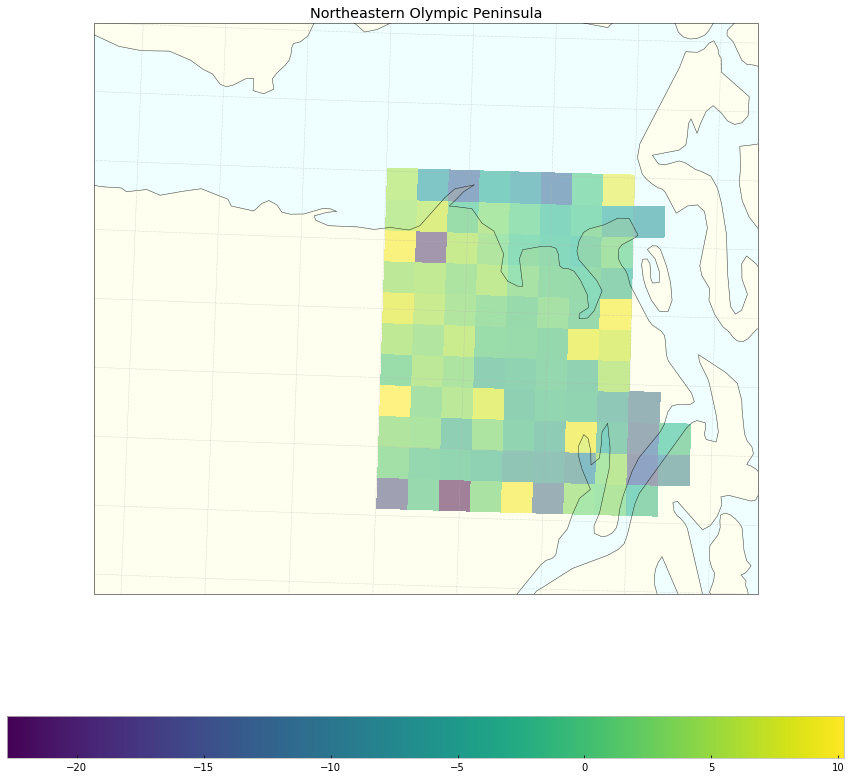

In [10]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.Geodetic())
ax.set_title("Northeastern Olympic Peninsula")
ax.gridlines(linestyle=":")
for myfeature in shapereader.Reader(ocean_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#E0FFFF', edgecolor='black', alpha=0.5)
for myfeature in shapereader.Reader(land_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#FFFFE0', edgecolor='black', alpha=0.5)

X = np.array(data['longitude']).reshape((11, 11))
Y = np.array(data['latitude']).reshape((11, 11))
Z = np.array(data['d_to_pb']).reshape((11, 11))

# Option 1
#ax.scatter(data['longitude'], data['latitude'], c=data['d_to_pb'], marker='s', s=400, transform=ccrs.PlateCarree())

# Option 2
#plt.contourf(X, Y, Z, transform=ccrs.PlateCarree())

# Option 3
X = 0.5 * (X[0:10, :] + X[1:11, :])
X = np.vstack((2.0 * X[0:1, :] - X[1:2, :], X, 2.0 * X[9:10, :] - X[8:9, :]))
X = np.hstack((X, X[:, 0:1]))
Y = 0.5 * (Y[:, 0:10] + Y[:, 1:11])
Y = np.hstack((2.0 * Y[:, 0:1] - Y[:, 1:2], Y, 2.0 * Y[:, 9:10] - Y[:, 8:9]))
Y = np.vstack((Y, Y[0:1, :]))
plt.pcolormesh(X, Y, Z, transform=ccrs.PlateCarree())

plt.colorbar(orientation='horizontal')
plt.show()

# Example: Physical map of Western United States

Set the boundaries of the map

In [11]:
lonmin = -130
lonmax = -100
latmin = 31
latmax = 49

Download land areas

In [12]:
shapename = 'geography_regions_polys'
land_areas_shp = shapereader.natural_earth(resolution='10m', category='physical', name=shapename)
land_areas_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_geography_regions_polys.shp'

In [13]:
land_areas = list(shapereader.Reader(land_areas_shp).geometries())
land_labels = list(shapereader.Reader(land_areas_shp).records())

Download marine areas

In [14]:
shapename = 'geography_marine_polys'
marine_areas_shp = shapereader.natural_earth(resolution='10m', category='physical', name=shapename)
marine_areas_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_geography_marine_polys.shp'

In [15]:
marine_areas = list(shapereader.Reader(marine_areas_shp).geometries())
marine_labels = list(shapereader.Reader(marine_areas_shp).records())

Download mountains

In [16]:
shapename = 'geography_regions_elevation_points'
mountains_shp = shapereader.natural_earth(resolution='10m', category='physical', name=shapename)
mountains_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_geography_regions_elevation_points.shp'

In [17]:
mountains_points = list(shapereader.Reader(mountains_shp).geometries())
mountains_labels = list(shapereader.Reader(mountains_shp).records())

Download point locations

In [18]:
shapename = 'geography_regions_points'
locations_shp = shapereader.natural_earth(resolution='10m', category='physical', name=shapename)
locations_shp

'/Users/ariane/.local/share/cartopy/shapefiles/natural_earth/physical/ne_10m_geography_regions_points.shp'

In [19]:
locations_points = list(shapereader.Reader(locations_shp).geometries())
locations_labels = list(shapereader.Reader(locations_shp).records())

Generate random colors

In [20]:
from random import randint
def randhex():
    r = lambda: randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

Plot

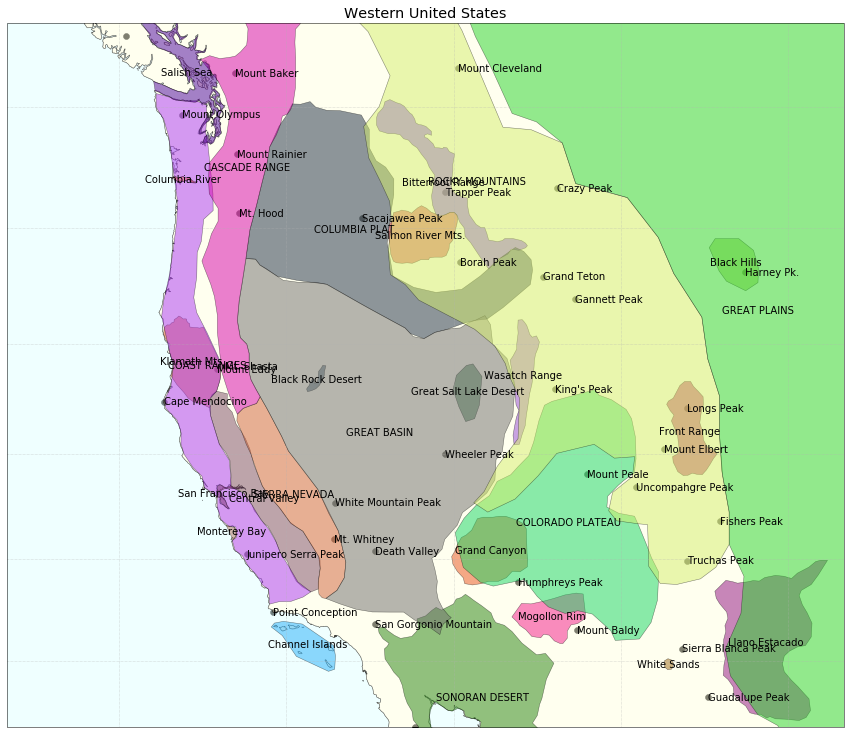

In [21]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.Mercator().GOOGLE)
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.Geodetic())
ax.set_title("Western United States")
ax.gridlines(linestyle=":")
for myfeature in shapereader.Reader(ocean_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#E0FFFF', edgecolor='black', alpha=0.5)
for myfeature in shapereader.Reader(land_shp).geometries(): 
    ax.add_geometries([myfeature], ccrs.PlateCarree(), facecolor='#FFFFE0', edgecolor='black', alpha=0.5)

# Plot land areas 
for label, area in zip(land_labels, land_areas):
    if ((area.centroid.coords[0][0] > lonmin) and (area.centroid.coords[0][0] < lonmax) and \
        (area.centroid.coords[0][1] > latmin) and (area.centroid.coords[0][1] < latmax)):
        if (label.attributes['featurecla'] not in ['Continent']):
            ax.add_geometries([area], ccrs.PlateCarree(), facecolor=randhex(), edgecolor='black', alpha=0.5)
            ax.annotate(label.attributes['name'], xy=(area.centroid.coords[0][0], area.centroid.coords[0][1]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), ha='center', va='center')

# Plot marine areas
for label, area in zip(marine_labels, marine_areas):
    if ((area.centroid.coords[0][0] > lonmin) and (area.centroid.coords[0][0] < lonmax) and \
        (area.centroid.coords[0][1] > latmin) and (area.centroid.coords[0][1] < latmax)):
        ax.add_geometries([area], ccrs.PlateCarree(), facecolor=randhex(), edgecolor='black', alpha=0.5)
        ax.annotate(label.attributes['name'], xy=(area.centroid.coords[0][0], area.centroid.coords[0][1]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), ha='center', va='center')

# Plot mountains
ax.scatter([point.coords[0][0] for point in mountains_points], \
           [point.coords[0][1] for point in mountains_points], color='black', transform=ccrs.PlateCarree())
for label, point in zip(mountains_labels, mountains_points):
    if ((point.coords[0][0] > lonmin) and (point.coords[0][0] < lonmax) and \
        (point.coords[0][1] > latmin) and (point.coords[0][1] < latmax)):
        ax.annotate(label.attributes['name'], xy=(point.coords[0][0], point.coords[0][1]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), ha='left', va='center')

# Plot point locations
ax.scatter([point.coords[0][0] for point in locations_points], \
           [point.coords[0][1] for point in locations_points], color='black', transform=ccrs.PlateCarree())
for label, point in zip(locations_labels, locations_points):
    if ((point.coords[0][0] > lonmin) and (point.coords[0][0] < lonmax) and \
        (point.coords[0][1] > latmin) and (point.coords[0][1] < latmax)):
        ax.annotate(label.attributes['name'], xy=(point.coords[0][0], point.coords[0][1]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), ha='left', va='center')

plt.show()